In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from matplotlib import rcParams

# Set font family
rcParams['font.family'] = 'Palatino Linotype'

Read Data

In [35]:
df = pd.read_csv('train_features.csv')
df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,05/05/2014,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,17/03/2013,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


Label Encoder

In [36]:
# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada variabel pendidikan dan status_pernikahan
df['pendidikan'] = label_encoder.fit_transform(df['pendidikan'])
df['status_pernikahan'] = label_encoder.fit_transform(df['status_pernikahan'])

# Menampilkan lima baris pertama dari dataframe yang telah diencode
df.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,5,4,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,05/05/2014,2
1,1950,5,4,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,17/03/2013,0
2,1966,5,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,2,4,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,5,4,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3817 non-null   int32  
 2   status_pernikahan        3817 non-null   int32  
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

RINGKASAN STATISTIK

In [38]:
num = ['pendapatan','jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging',	'belanja_ikan', 'belanja_kue', 'pembelian_diskon', 'pembelian_web',	'pembelian_toko']
df_num = df[num]

In [39]:
df_num.describe()

,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko
count,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000
mean,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818
std,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738
min,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000
50%,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000
75%,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000
max,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000


EKSPLORASI DATA

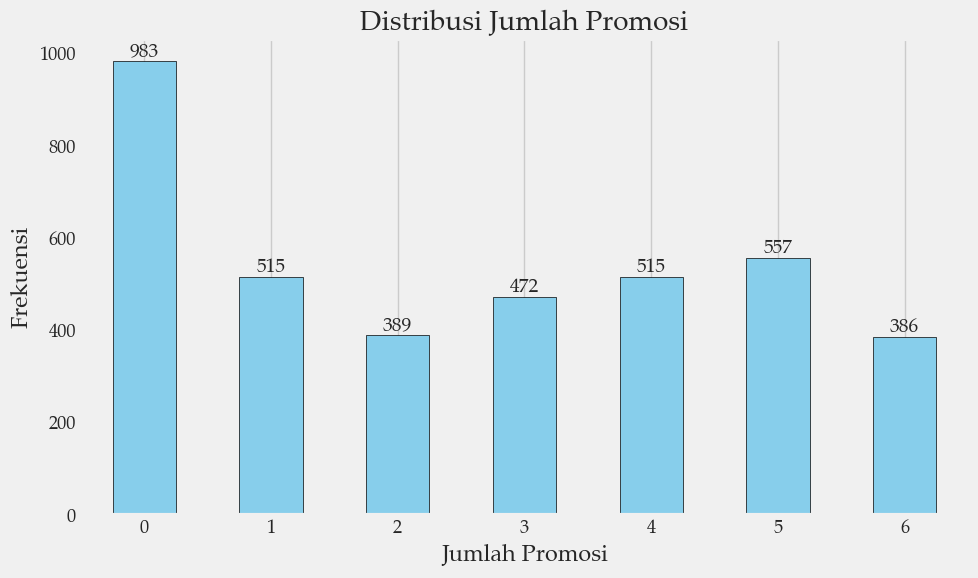

In [56]:
# Menghitung jumlah observasi untuk setiap nilai dalam variabel jumlah_promosi
jumlah_promosi_counts = df['jumlah_promosi'].value_counts().sort_index()
# Plot bar chart
plt.figure(figsize=(10, 6))
jumlah_promosi_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Promosi')
plt.xlabel('Jumlah Promosi')
plt.ylabel('Frekuensi')
plt.grid(axis='y')
# Menambahkan label nilai frekuensi di atas setiap bar
for i, value in enumerate(jumlah_promosi_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


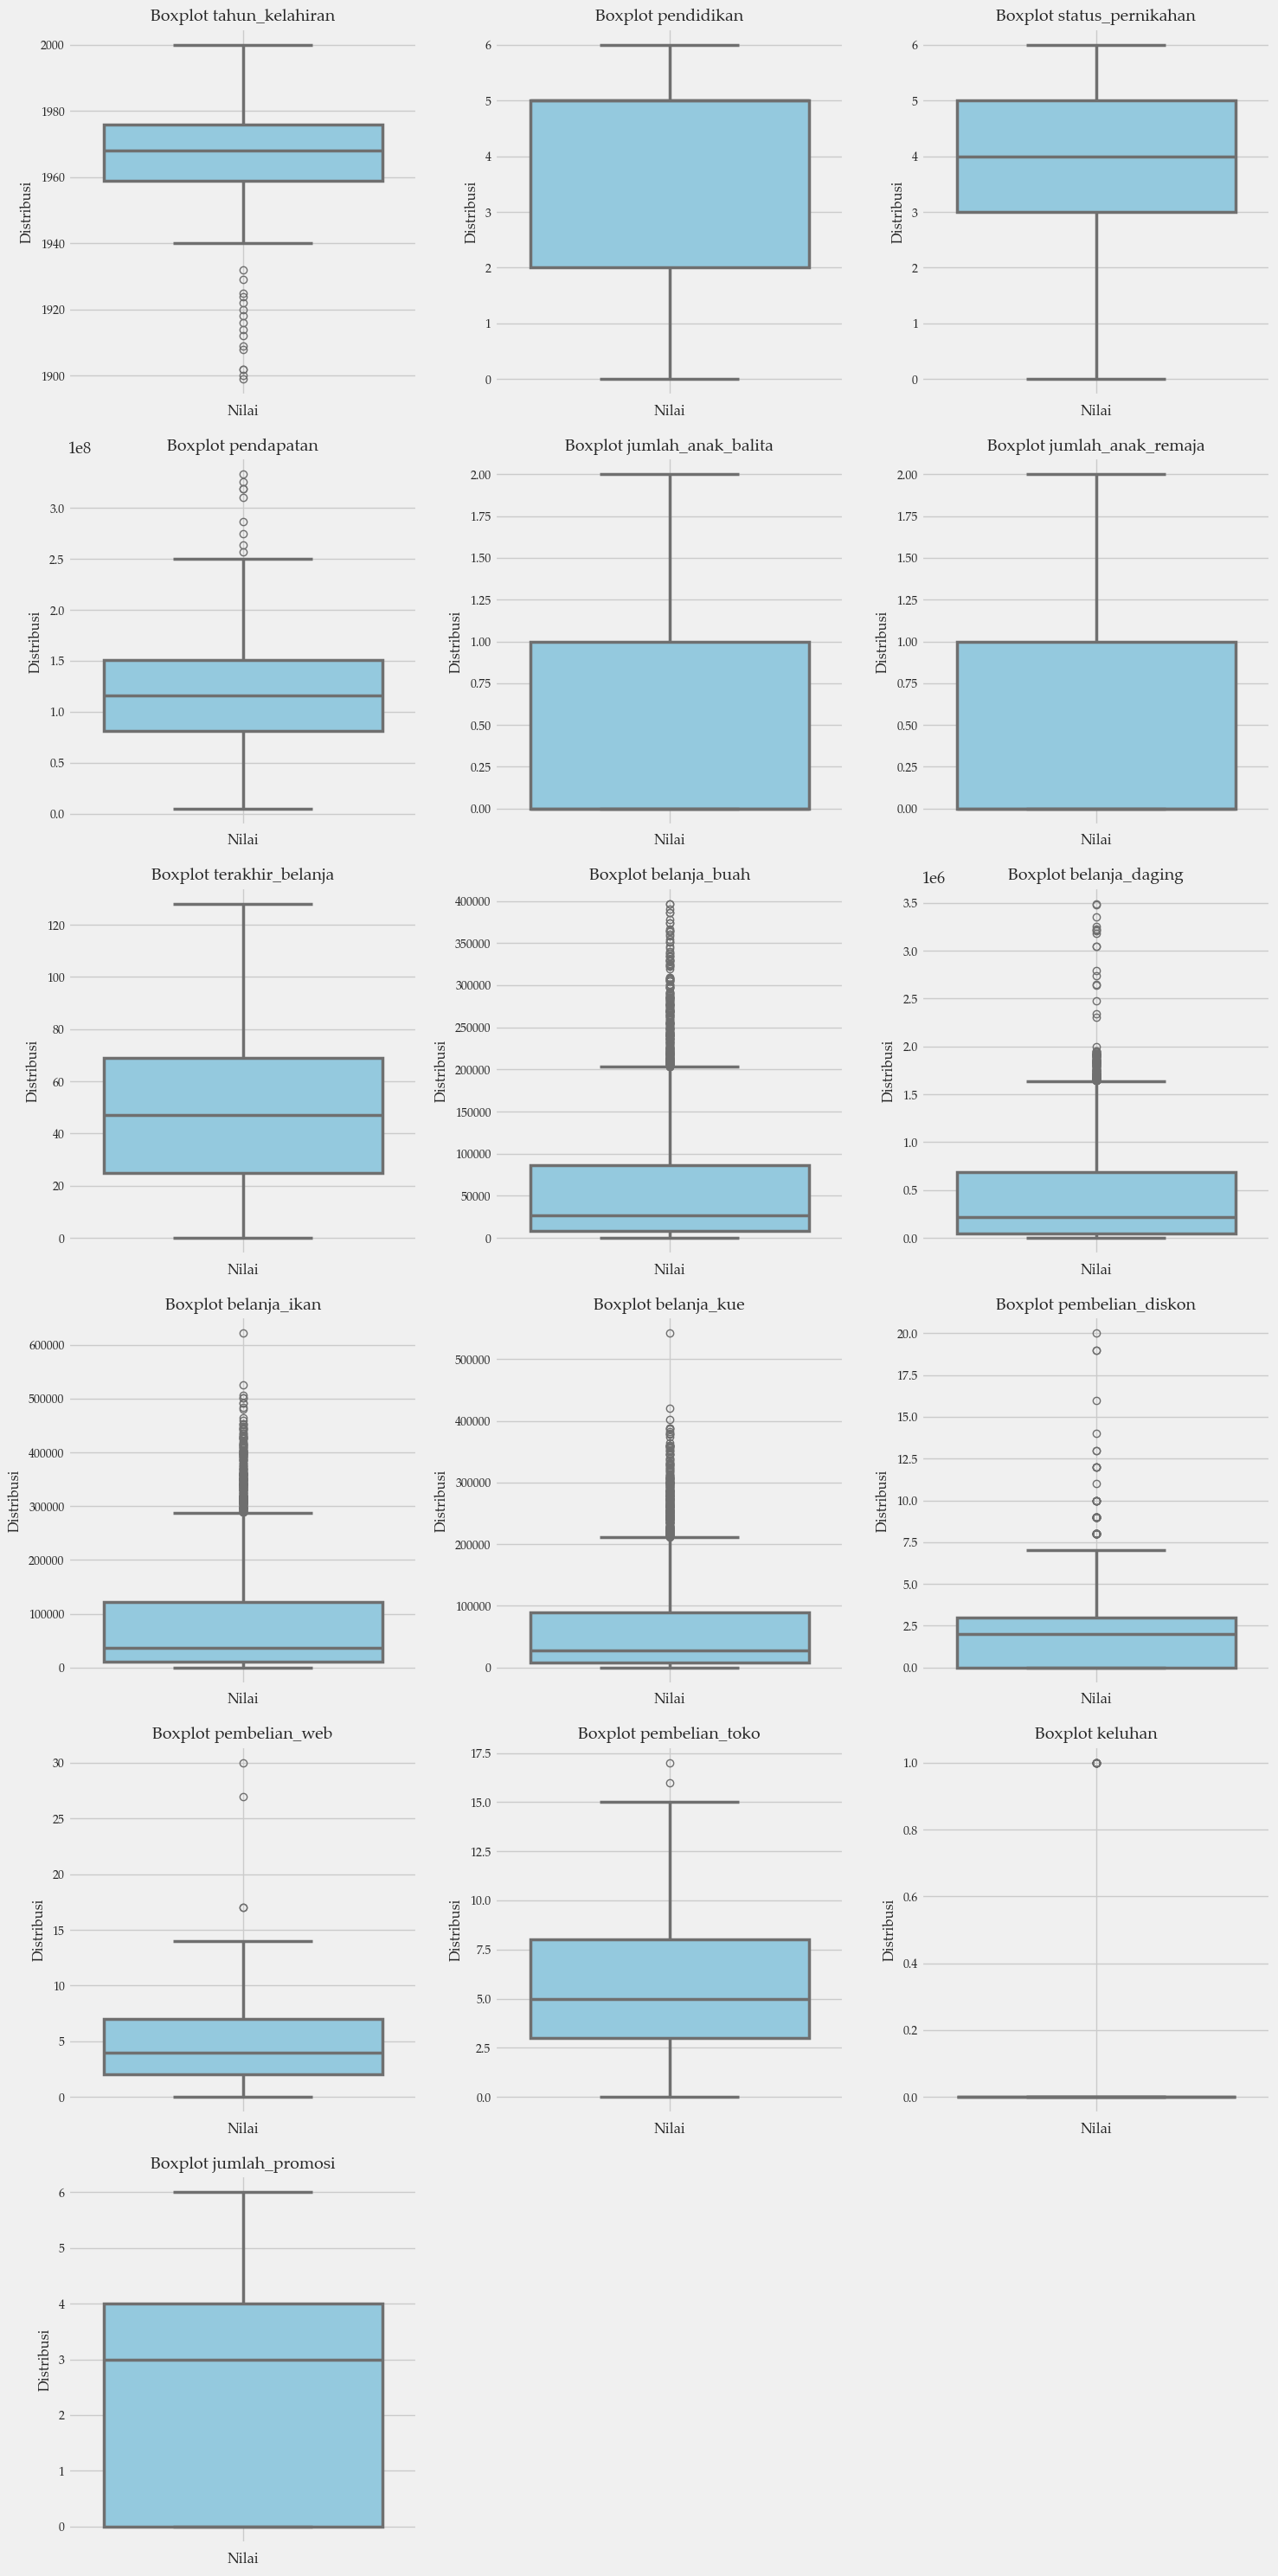

In [41]:
# Menghilangkan kolom 'tahun_kelahiran' dan 'tanggal_menjadi_anggota' dari dataframe
df_filtered = df.drop(columns=['tanggal_menjadi_anggota'])

# Menentukan jumlah baris dan kolom subplot yang sesuai
num_rows = (len(df_filtered.columns) - 1) // 3 + 1
num_cols = min(len(df_filtered.columns), 3)

# Membuat satu figure untuk semua boxplot
plt.figure(figsize=(15, 5 * num_rows))

# Iterasi melalui setiap kolom dan membuat boxplot di subplot yang sesuai
for i, column in enumerate(df_filtered.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_filtered[column], color='skyblue', linewidth=2.5)
    plt.title(f'Boxplot {column}', fontsize=14)
    plt.xlabel('Nilai', fontsize=12)
    plt.ylabel('Distribusi', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotasi label sumbu x agar lebih mudah dibaca
    plt.yticks(fontsize=10)  # Ukuran font untuk label sumbu y
    plt.grid(True)  # Menambahkan grid

plt.tight_layout()
plt.show()


In [42]:
# Membuat fungsi untuk menghitung jumlah outlier
def count_outliers(series):
    # Menghitung quartile pertama (Q1) dan quartile ketiga (Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Menghitung jumlah outlier
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Menghitung jumlah outlier untuk setiap variabel
outlier_counts = df_filtered.apply(count_outliers)
print(outlier_counts)

tahun_kelahiran        16
pendidikan              0
status_pernikahan       0
pendapatan              9
jumlah_anak_balita      0
jumlah_anak_remaja      0
terakhir_belanja        0
belanja_buah          233
belanja_daging        128
belanja_ikan          219
belanja_kue           262
pembelian_diskon       81
pembelian_web           4
pembelian_toko          2
keluhan                18
jumlah_promosi          0
dtype: int64


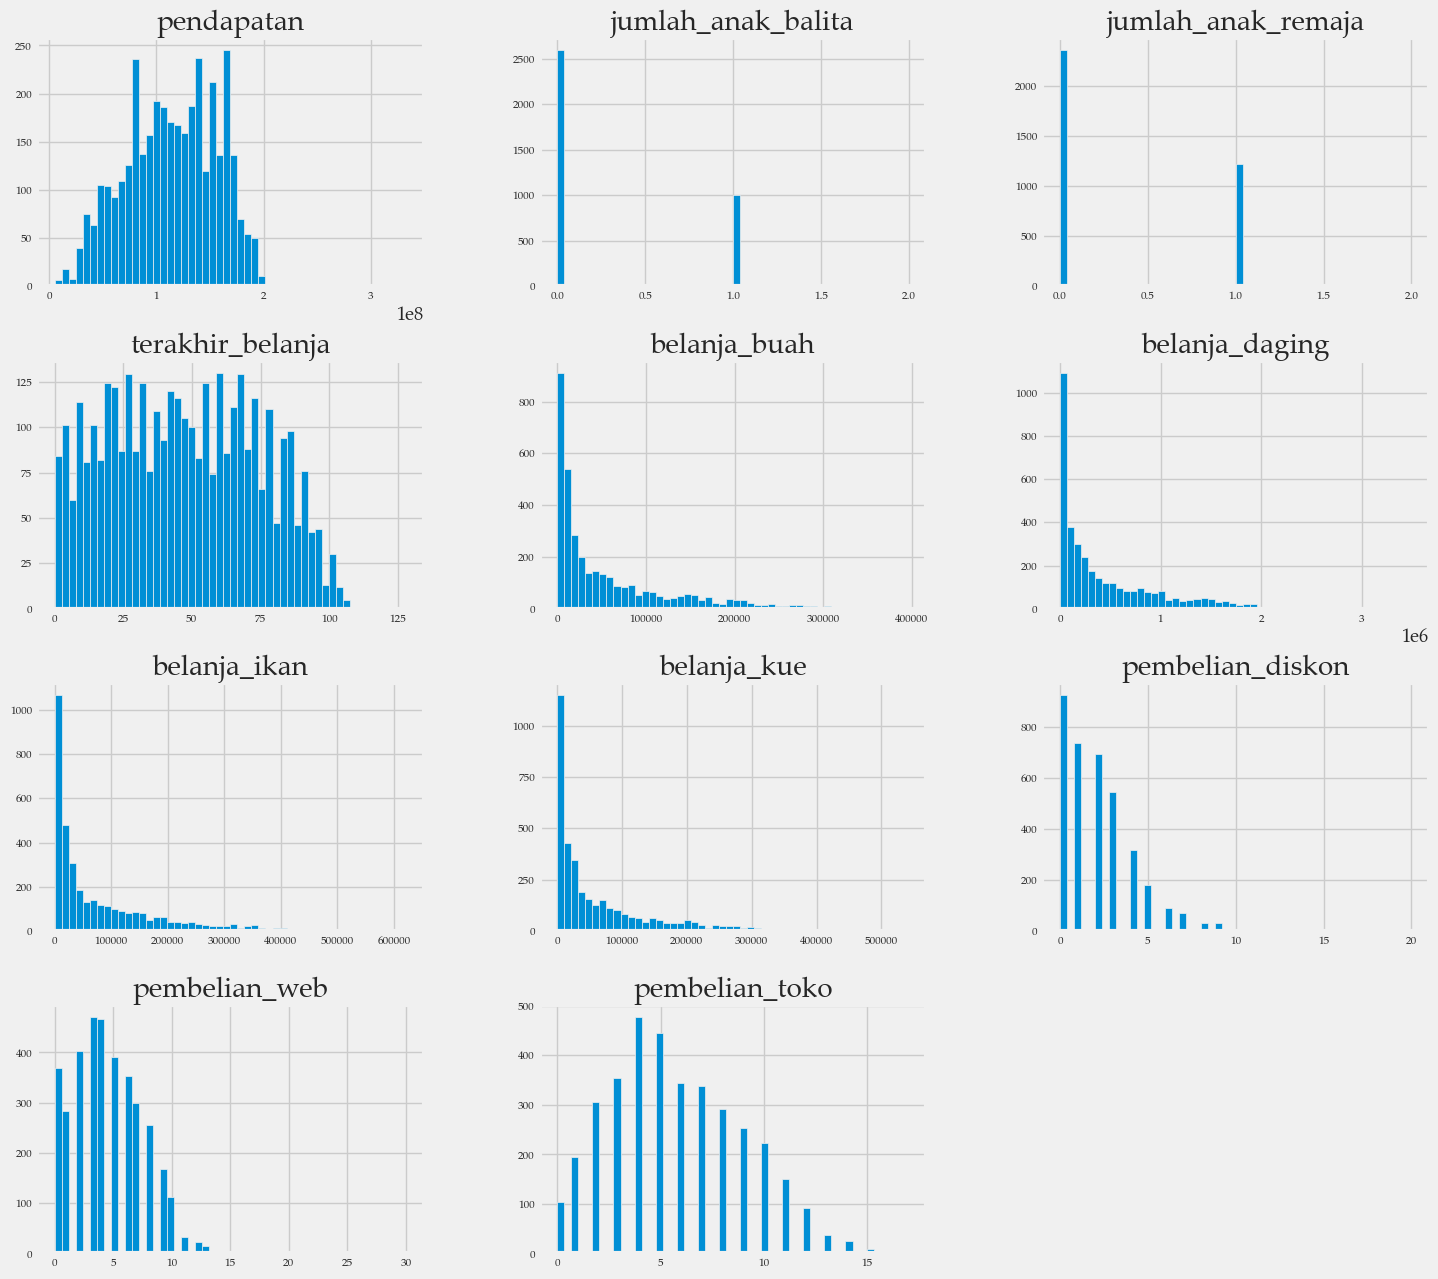

In [61]:
# Histogram data numerik
df_num.hist(figsize=(16, 15), bins=50, xlabelsize=8, ylabelsize=8);

C:\Users\asus\AppData\Local\Temp\ipykernel_20364\1953264771.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


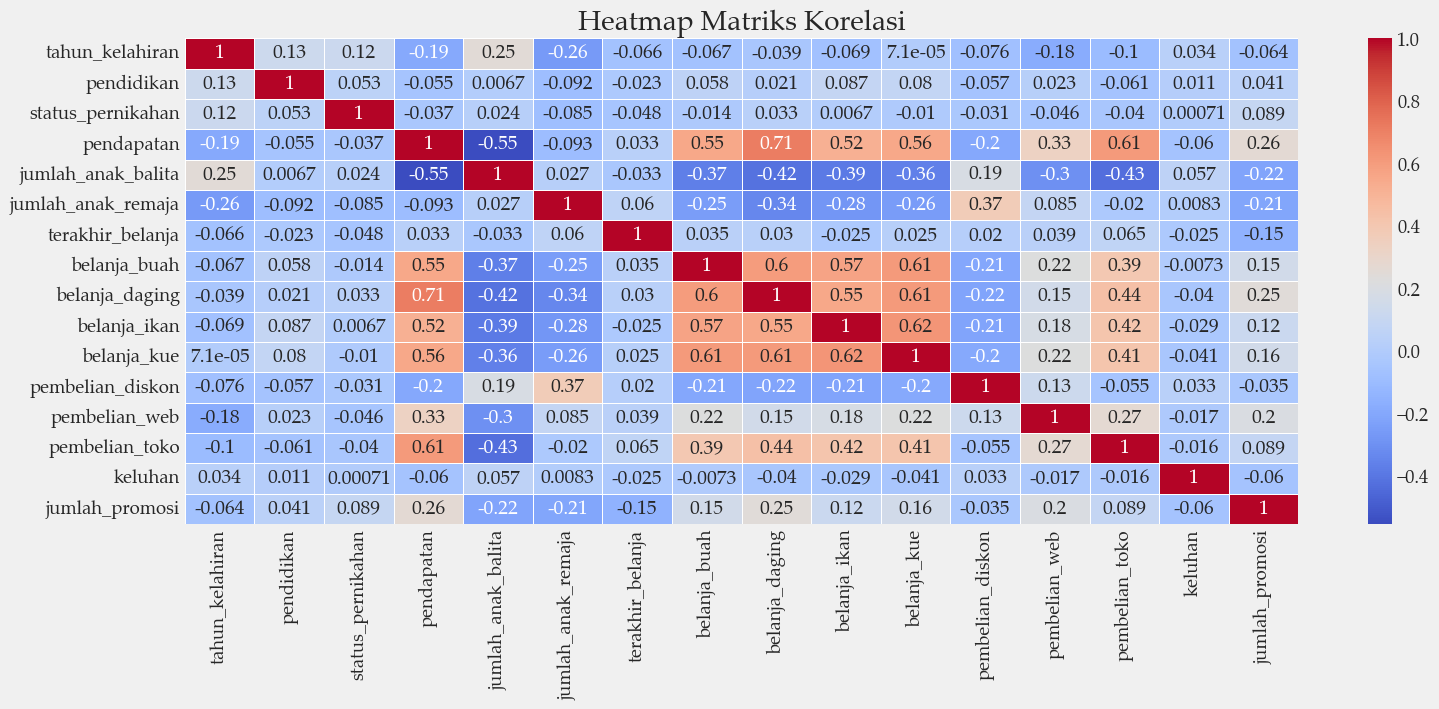

In [44]:
# Matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Matriks Korelasi')
plt.show()